In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from helita.sim import rh15d
from helita.vis import rh15d_vis
from IPython.display import HTML, display, set_matplotlib_formats

set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(7, 7 / 1.75)) # Larger figure sizes
plt.rc('font', size=12)

Make new wavelength file on same range as IRIS file.

In [2]:
IRIS_wave = rh15d.read_wave_file('../../rh_ast5210/Atoms/wave_files/IRIS_NUV_full.wave')
rh15d.make_wave_file('new.wave', IRIS_wave[0], IRIS_wave[-1], 0.001)

Wrote 5142 wavelengths to file.


Change wavetable in `keyword.input`, include all atoms in `atoms.input`, uncomment `kurucz.input`, include `gfMgIIhk_IRIS_full` in `kurucz.input`, and change `PRD_N_MAX_ITER` to 3 in `keyword.input`. Now we run **RH**.

In [7]:
"""
Uncomment if not already run
"""
#!../rh15d_ray

'\nUncomment if not already run\n'

Now we can plot intensity

--- Read output/output_aux.hdf5 file.


/uio/hume/student-u09/meudnaes/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/uio/hume/student-u09/meudnaes/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


--- Read output/output_indata.hdf5 file.
--- Read output/output_ray.hdf5 file.


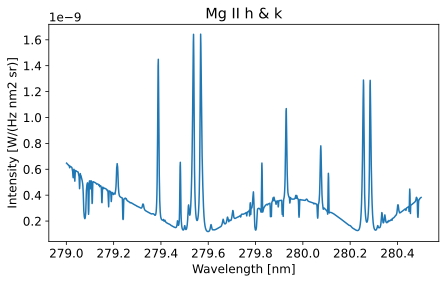

In [4]:
data = rh15d.Rh15dout('output/')
data.close()
wave = data.ray.wavelength
intensity = data.ray.intensity
indices = np.arange(len(wave))[(wave > 279) & (wave < 280.5)]

fig, ax = plt.subplots()
ax.plot(wave[indices], intensity[0,0,indices])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Intensity [W/(Hz nm2 sr)]")
ax.set_title("Mg II h & k");

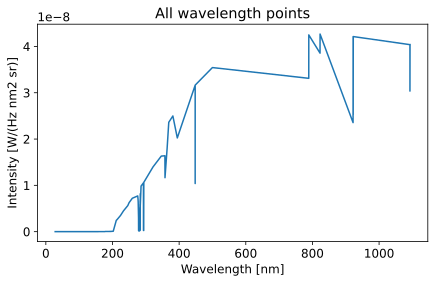

In [5]:
fig, ax = plt.subplots()
ax.plot(wave[:], intensity[0,0,:])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Intensity [W/(Hz nm2 sr)]")
ax.set_title("All wavelength points");

### Line formation

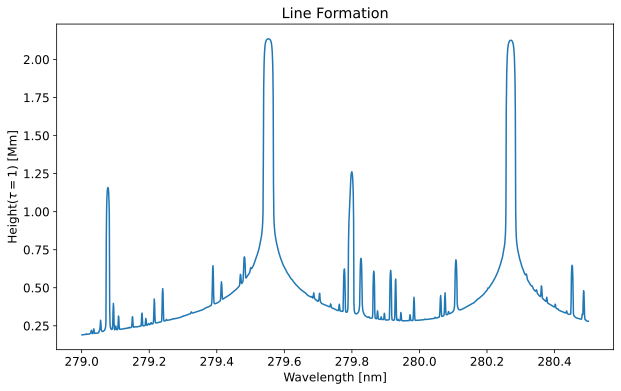

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(wave[indices], data.ray.tau_one_height[0, 0, indices]/1e6)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel(r"Height($\tau = 1$) [Mm]")
ax.set_title("Line Formation");